In [1]:
%run Utils/FGindex_function.ipynb
%run Utils/portfolio_metrics.ipynb
%run Utils/Backtesting_function.ipynb

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from operator import itemgetter
from datetime import date, datetime
import time

In [3]:
stock = pd.read_csv("DATA/data_FGscore/1010.csv")

In [4]:
stock.columns = ["index","datetime","close","FG_score"]
stock = stock.sort_values("datetime").reset_index(drop=True)

In [5]:
# make candid list
threshold_list = []

for b in np.arange (0.1,0.6,0.1):
    for s in np.arange(0.5,1,0.1):
        threshold_list.append([b,s])
        

In [6]:
best_close = 0
best_parameter = [0,0] 

print("market_bestScore : " + str(stock.close[len(stock)-1]))
print()

for i in threshold_list:
    tmp,anomaly_list = back_testing(stock, buying_score = i[0], selling_score = i[1], print_type = False)
    
    if best_close < tmp[len(tmp)-1]:
        print(i)
        print("as-is : " + str(best_close) + " / to-be : " + str(tmp[len(tmp)-1]))
        best_close = tmp[len(tmp)-1]
        best_parameter = i
        


market_bestScore : 2430.61

[0.1, 0.5]
as-is : 0 / to-be : 54.99617799829672
[0.1, 0.6]
as-is : 54.99617799829672 / to-be : 64.54420747451663
[0.1, 0.7]
as-is : 64.54420747451663 / to-be : 81.94502615884309
[0.1, 0.8999999999999999]
as-is : 81.94502615884309 / to-be : 2559.6359555345857
[0.2, 0.8999999999999999]
as-is : 2559.6359555345857 / to-be : 6019.5674239350765


In [7]:
tmp,anomaly_list = back_testing(stock, buying_score = best_parameter[0], selling_score = best_parameter[1], print_type = True)

sell stock : 1998-01-15
buying stock : 1998-05-14
sell stock : 1998-12-11
buying stock : 2000-02-21
sell stock : 2018-05-02
buying stock : 2020-03-16


In [8]:
stock['simul'] = tmp
datetime_list = [datetime.strptime(i,"%Y-%m-%d").date() for i in stock.datetime]
stock["datetime"] = datetime_list

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



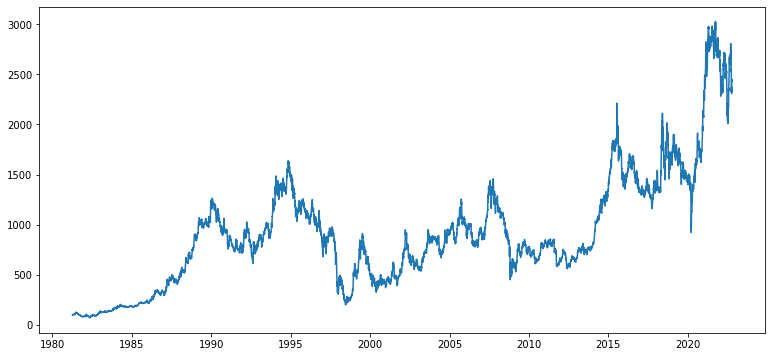

In [9]:
plt.figure(figsize=(13,6))
plt.plot(stock.datetime,stock.close)

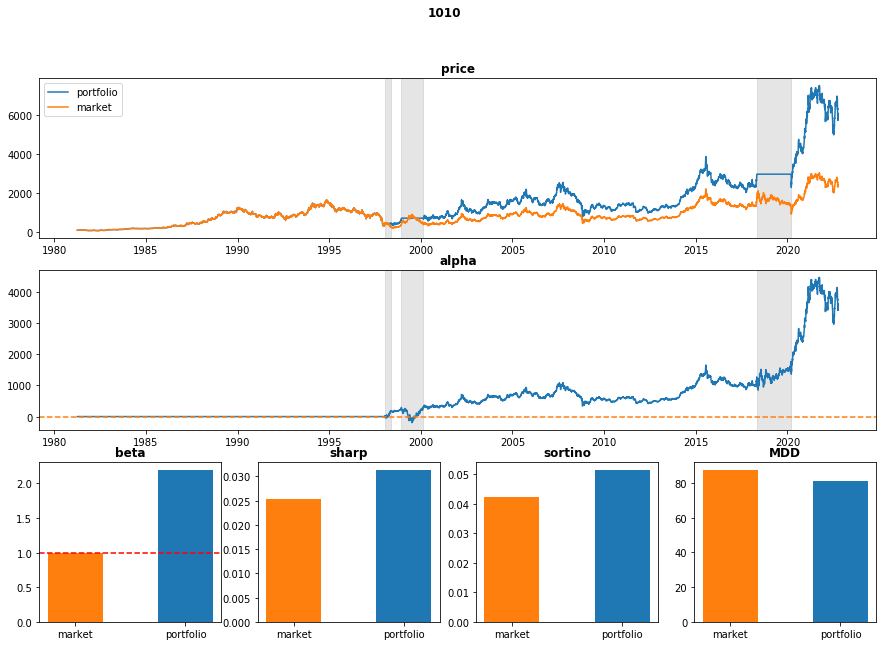

In [11]:
plot_all(stock,anomaly_list,'1010')